In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras.layers as k
from tensorflow.keras.models import Model

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train/255
x_test = x_test/255


(50000, 1)


In [4]:
print(y_train.shape)
print(x_train.shape)

(50000, 1)
(50000, 32, 32, 3)


In [5]:
y_train,y_test = y_train.flatten(),y_test.flatten()

In [6]:
print(y_train.shape)
print(x_train.shape)

(50000,)
(50000, 32, 32, 3)


In [7]:
numClasses = len(set(y_train))
numClasses

10

In [8]:

i = k.Input(shape=x_train[0].shape)
x = k.Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = k.Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = k.Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = k.Flatten()(x)
x = k.Dropout(0.2)(x)
x = k.Dense(512,activation='relu')(x)
x = k.Dropout(0.2)(x)
x = k.Dense(numClasses,activation='softmax')(x)

model = Model(i,x)

In [ ]:

# i = k.Input(shape=x_train[0].shape)
# x = k.Conv2D(32,(3,3),padding='same',activation='relu')(i)
# x = k.BatchNormalization()(x)
# x = k.Conv2D(32,(3,3),padding='same',activation='relu')(i)
# x = k.BatchNormalization()(x)
# x = k.Conv2D(32,(3,3),padding='same',activation='relu')(i)
# x = k.BatchNormalization()(x)
# x = MaxPooling2D((2,2))

# x = k.Conv2D(64,(3,3),strides=2,activation='relu')(x)
# x = k.Conv2D(128,(3,3),strides=2,activation='relu')(x)
# x = k.Flatten()(x)
# x = k.Dropout(0.2)(x)
# x = k.Dense(512,activation='relu')(x)
# x = k.Dropout(0.2)(x)
# x = k.Dense(numClasses,activation='softmax')(x)

# model = Model(i,x)

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

r = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 47s 29ms/step - loss: 1.0277 - accuracy: 0.6328 - val_loss: 1.0202 - val_accuracy: 0.6366
Epoch 2/20
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9190 - accuracy: 0.6768 - val_loss: 0.9397 - val_accuracy: 0.6710
Epoch 3/20
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8301 - accuracy: 0.7073 - val_loss: 0.9116 - val_accuracy: 0.6793
Epoch 4/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7513 - accuracy: 0.7326 - val_loss: 0.9203 - val_accuracy: 0.6806
Epoch 5/20
1563/1563 [==============================] - 41s 26ms/step - loss: 0.6841 - accuracy: 0.7570 - val_loss: 0.8925 - val_accuracy: 0.6903
Epoch 6/20
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6168 - accuracy: 0.7818 - val_loss: 0.9012 - val_accuracy: 0.6955
Epoch 7/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.5670 - accuracy: 0.7991 - val_loss: 0.9138 -

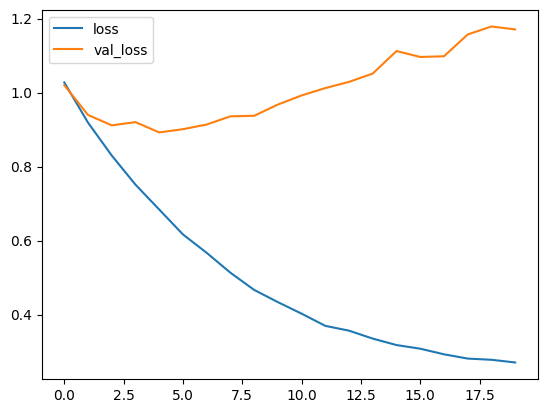

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

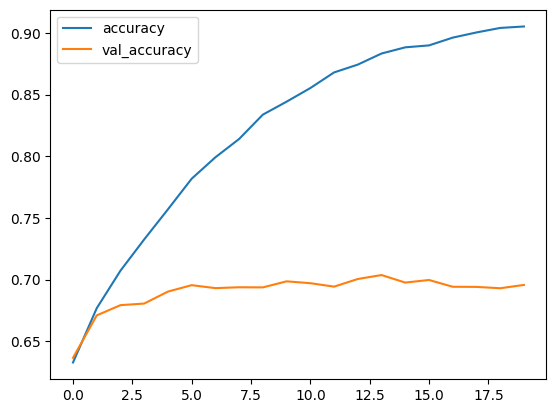

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [15]:
bs = 32
dataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,horizontal_flip=True)
train_generator = dataGenerator.flow(x_train,y_train,bs)
stepsPerEpoch = x_train.shape[0]//bs
r = model.fit_generator(train_generator,validation_data = (x_test,y_test),steps_per_epoch = stepsPerEpoch, epochs = 10)

Epoch 1/10


<ipython-input-15-d2b9bf18ad1f>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator,validation_data = (x_test,y_test),steps_per_epoch = stepsPerEpoch, epochs = 10)


1562/1562 [==============================] - 64s 41ms/step - loss: 0.9686 - accuracy: 0.6768 - val_loss: 0.8902 - val_accuracy: 0.6935
Epoch 2/10
1562/1562 [==============================] - 65s 42ms/step - loss: 0.8745 - accuracy: 0.7014 - val_loss: 0.8540 - val_accuracy: 0.7026
Epoch 3/10
1562/1562 [==============================] - 64s 41ms/step - loss: 0.8318 - accuracy: 0.7145 - val_loss: 0.8177 - val_accuracy: 0.7185
Epoch 4/10
1562/1562 [==============================] - 63s 40ms/step - loss: 0.8166 - accuracy: 0.7167 - val_loss: 0.8054 - val_accuracy: 0.7198
Epoch 5/10
1562/1562 [==============================] - 66s 42ms/step - loss: 0.7757 - accuracy: 0.7291 - val_loss: 0.7979 - val_accuracy: 0.7286
Epoch 6/10
1562/1562 [==============================] - 63s 40ms/step - loss: 0.7551 - accuracy: 0.7370 - val_loss: 0.7699 - val_accuracy: 0.7354
Epoch 7/10
1562/1562 [==============================] - 63s 40ms/step - loss: 0.7469 - accuracy: 0.7400 - val_loss: 0.7934 - val_accura

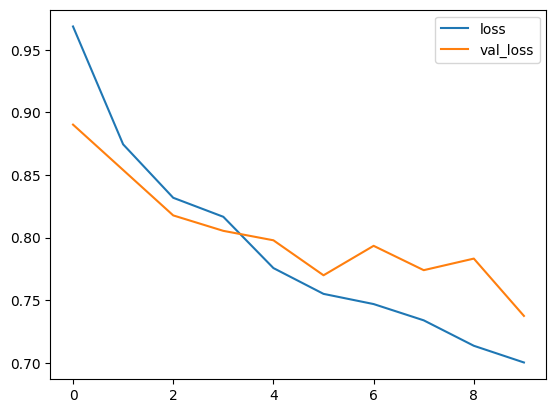

In [17]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

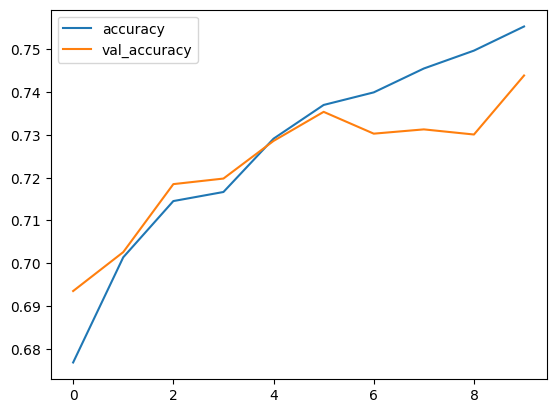

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()